In [1]:
import torch

from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import numpy as np
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('NAFNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def single_image_inference(model, img, save_path):
      model.feed_data(data={'lq': img.unsqueeze(dim=0)})

      if model.opt['val'].get('grids', False):
          model.grids()

      model.test()

      if model.opt['val'].get('grids', False):
          model.grids_inverse()

      visuals = model.get_current_visuals()
      sr_img = tensor2img([visuals['result']])
      imwrite(sr_img, save_path)

/home/lllei/anaconda3/envs/nafnet/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
opt_path = 'options/test/SIDD/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

 load net keys <built-in method keys of collections.OrderedDict object at 0x7f558d9b5240>


2022-05-08 00:46:52,372 INFO: Model [ImageRestorationModel] is created.


In [3]:
opt

OrderedDict([('name', 'NAFNet-SIDD-width64-test'),
             ('model_type', 'ImageRestorationModel'),
             ('scale', 1),
             ('num_gpu', 1),
             ('manual_seed', 10),
             ('datasets',
              OrderedDict([('val',
                            OrderedDict([('name', 'SIDD_val'),
                                         ('type', 'PairedImageDataset'),
                                         ('dataroot_gt',
                                          './datasets/SIDD/val/gt_crops.lmdb'),
                                         ('dataroot_lq',
                                          './datasets/SIDD/val/input_crops.lmdb'),
                                         ('io_backend',
                                          OrderedDict([('type', 'lmdb')])),
                                         ('phase', 'val'),
                                         ('scale', 1)]))])),
             ('network_g',
              OrderedDict([('type', 'NAFNet'),
     

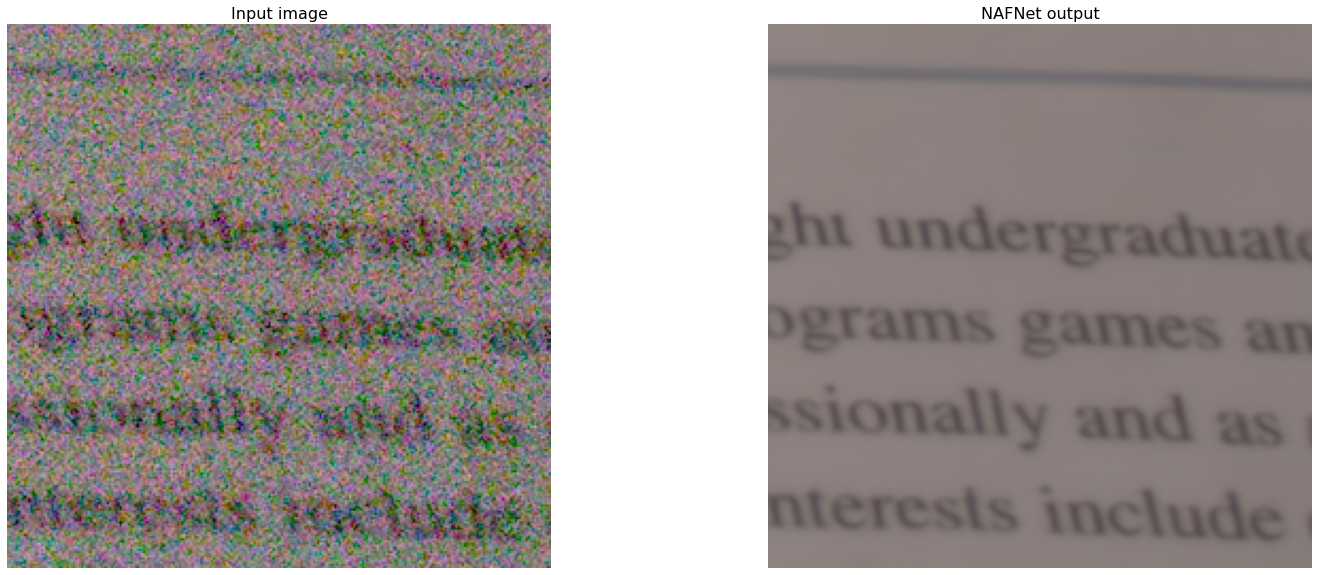

In [4]:
input_path = 'demo_input/noisy-demo-0.png'
output_path = 'demo_output/noisy-demo-0.png'

img_input = imread(input_path)
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = imread(output_path)
display(img_input, img_output)

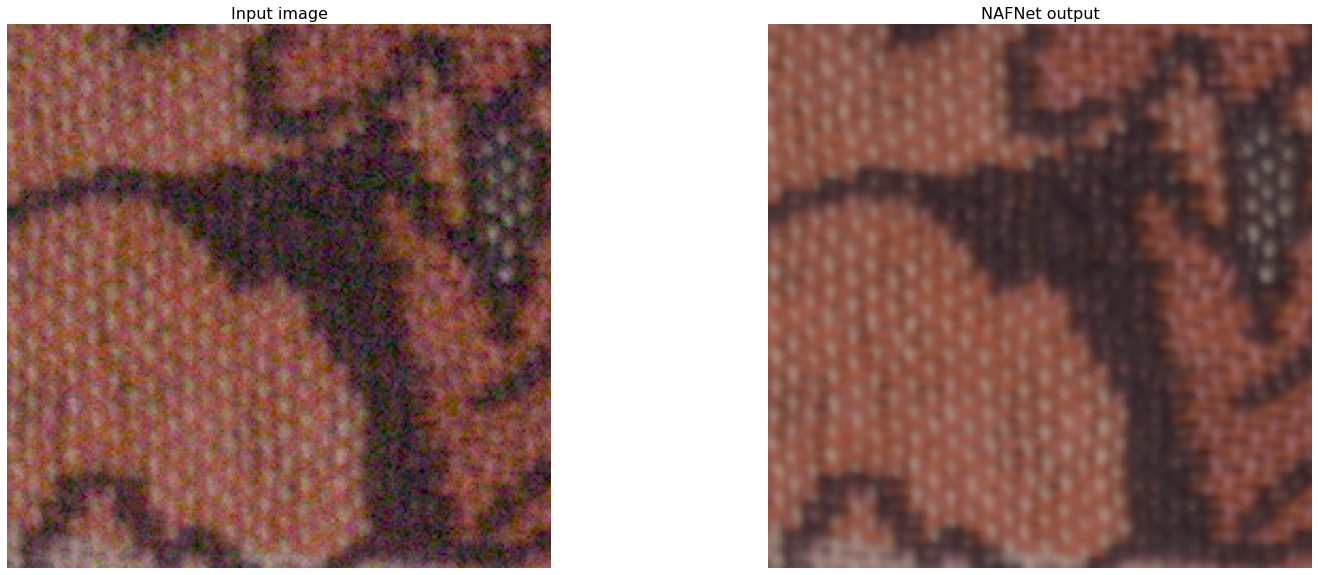

In [5]:
input_path = 'demo_input/noisy-demo-1.png'
output_path = 'demo_output/noisy-demo-1.png'

img_input = imread(input_path)
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = imread(output_path)
display(img_input, img_output)